In [160]:
import numpy as np
import scipy
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

#### MODEL REPRESENTATION

In [173]:
# INPUT DATA
# 5000 training samples, each sample is 20*20 pixel image, unrolled into a 400 dimensional vector
mat = spio.loadmat('neural_nets_data/ex3data1.mat') 

X = mat['X']
# print X.shape
y = mat['y']
m = X.shape[0]

input_layer_size = 400
hidden_layer = 25
output_layer = 10

weights = spio.loadmat('neural_nets_data/ex3weights.mat')
theta1 = weights['Theta1']   # size = 25 * 401
theta2 = weights['Theta2']   # size = 10 * 26

#### DISPLAY DATA 

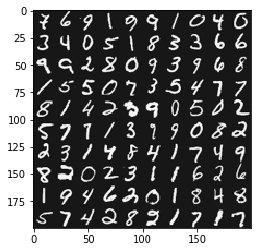

In [180]:
def display_data():
    size = 20
    nrows = 10
    ncols = 10
    indices_display = random.sample(range(training_samples), nrows * ncols)
    image_display = np.zeros((size * nrows, size * ncols))
    
    irow, icol = 0, 0
    for idx in indices_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        img = (X[idx]).reshape(size, size).T
        image_display[irow * size : irow * size + img.shape[0], icol * size : icol * size + img.shape[1]] = img
        icol += 1

    plt.imshow(image_display, cmap = cm.Greys_r)
    plt.show()

display_data()

#### FEEDFORWARD PROPAGATION AND PREDICTION 

In [162]:
# Logistic/Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [163]:
def predict_nn(theta1, theta2, X):
    a1 = np.column_stack((np.ones((m, 1)), X))
    a2 = np.column_stack((np.ones((m, 1)), sigmoid(np.dot(a1, theta1.T))))
    a3 = sigmoid(np.dot(a2, theta2.T))
    return a3

#### CALCULATE ACCURACY

In [181]:
predictions = predict_nn(theta1, theta2, X)

incorrect_predictions = []
correct = 0

for i in range(0, m):
    pred   = np.argmax( predictions[i] ) + 1
    actual = y[i]
    if actual == pred:
        correct += 1
    else:
        incorrect_predictions.append(i)

print "Accuracy:", (correct * 100.0 / m )

Accuracy: 97.52


#### EXAMINE INCORRECT PREDICTIONS 

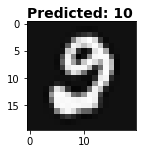

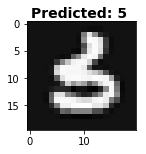

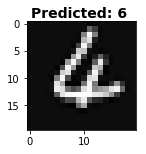

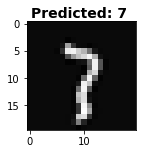

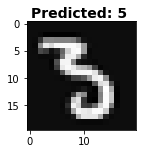

In [190]:
for x in range(0, 5):
    i = random.choice(incorrect_predictions)
    img = (X[i]).reshape(20, 20).T
    fig = plt.figure(figsize = (2, 2))
    plt.imshow(img,cmap = cm.Greys_r)
    predicted_val = np.argmax( predictions[i] ) + 1
    fig.suptitle('Predicted: %d'%predicted_val, fontsize=14, fontweight='bold')
    plt.show()